# Dimensionality Reduction

Momenteel hebben we gewerkt met datasets met een beperkt aantal features maar dat kan bijvoorbeeld snel oplopen tot 1000-en features.
Denk hierbij bijvoorbeeld aan de bag-of-words methoden, of als we foto's willen bestuderen waar elke pixel drie waarden heeft (rgb).
Dimensionality Reduction is een unsupervised learning techniek om de belangrijkste features uit de dataset te detecteren en zo het aantal benodigde features sterk te verlagen.
Dit wordt vaak gebruikt als pre-processing step van bijvoorbeeld supervised learning technieken om het fitten van de modellen te versnellen.
De meest gebruikte techniek binnen dit domein is PCA of Principal Component Analysis.
Andere mogelijkheden voor dit te doen is 
* Linear Discriminant Analysis
* Auto Encoders (Volgend jaar)
* Missing Values Ratio
* Low Variance Filter

Waarom wordt dimensionality reduction vaak toegepast?
* Curse of dimensionality: ML-technieken duren vaak veel langer met meer features en kunnen ook de accuraatheid verlagen omdat ze voor ruis/verwarring zorgen.
* Rechtstreeks werken op visuele data bevat heel veel ruis, vooral bijvoorbeeld door kleine shifts in het beeld
* Verwijderen van ruis
* Compressie van data
* Visualisatie van een dataset door ze te reduceren tot 2 of drie features. Dit kan namelijk getoond worden in een plot.

**Merk op:** De resulterende features zijn niet kolommen uit de bestaande dataset maar kunnen eruit berekend worden door 1 of meerdere kolommen te combineren.

## Principal Component Analysis

Redelijk snel een wiskundige techniek maar we gaan het vooral toepassen en focussen op wat eruit komt omdat dit niet altijd eenvoudig te interpreteren is.
Daarom ga ik de werking van dit algoritme uitleggen aan de hand van een voorbeeld. 
De bron van dit voorbeeld vind je [hier](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html).

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

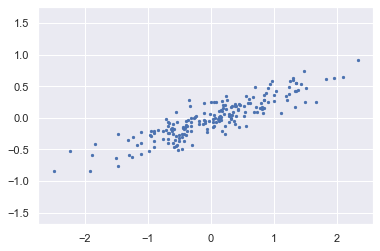

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.axis('equal');

Hoe zouden we nu deze hoeveelheid data kunnen reduceren?
Dit kan bijvoorbeeld door alle punten te projecteren op de x-as.
Hierbij laten we dus eigenlijk de y-as of tweede feature vallen.
Het is echter eenvoudig in te zien dat je op deze manier veel informatie gaat verliezen.

PCA gaat echter niet rechtstreeks features laten vallen maar gaat een ander assenstelsel definieren zodat de meeste informatie door de eerste as wordt voorgesteld.
Dit is een beetje gelijkaardig aan de beste rechte vinden met lineaire regressie maar dit gebeurd op een wiskundig andere manier.

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


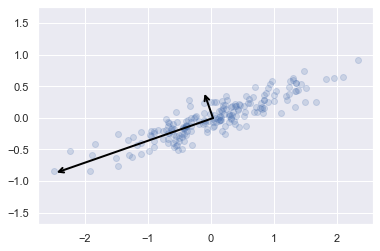

In [5]:
# importeer PCA
from sklearn.decomposition import PCA
# maak het PCA-model om van 2 features naar 2 principal components te gaan
pca = PCA(n_components=2)
# fit op de data
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    # dit tekent de zwarte pijltjes per principal component
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Deze assen worden voorgesteld door vectoren (zie de matrix).
De vectoren bepalen hoe welke features gecombineerd moeten worden en worden **principal components** genoemd.
Op basis van de variantie is het ook duidelijk dat de eerste component veel belangrijker is dan de tweede.

Als de dataset nu getekend wordt met het nieuwe assenstelsel bekomen we:

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

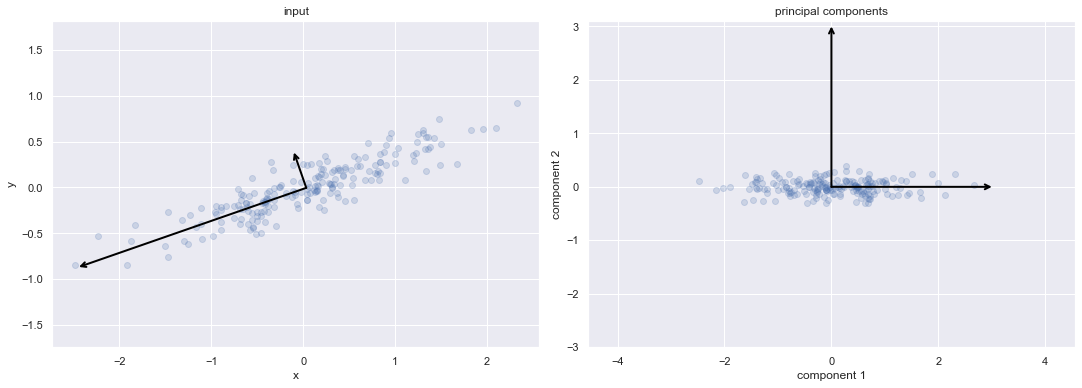

In [10]:
# 2 figuren naast elkaar
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data (ax[0] is de eerste plot/figuur)
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

Je kan nu twee zaken opmerken.
Ten eerste is de data veel beter verspreid over het assenstelsel.
Dit komt omdat de schaal van de assen niet gelijk is en dus de data opengetrokken wordt.
Veel belangrijker is echter dat als je nu de tweede component laat vallen, dat er veel minder data verloren gaat.

original shape:    (200, 2)
transformed shape: (200, 1)


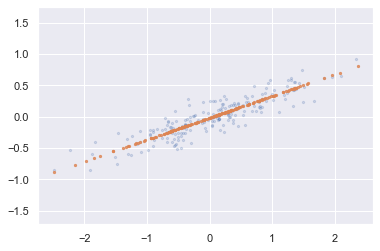

In [11]:
# hier hou ik maar 1 component over
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) # fit - transform -> kan ook in een pipeline gebruikt worden
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

# inverse transform om de orange puntjes te kunnen plotten
X_new = pca.inverse_transform(X_pca)
# blauwe puntjes
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, s=5)

#orange puntjes
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, s=5)
plt.axis('equal');

### PCA in computer visie

Uit het vorige voorbeeld zou je misschien kunnen denken dat het voordeel van PCA toe te passen beperkt is.
Onderstaande voorbeeld past PCA toe op beelden van van handgeschreven cijfers van 8 bij 8 pixels (64 features dus).
PCA is 1 van de eerste methoden om te werken met beelden omdat het in staat was om de beschikbare data sterk te reduceren.
In deze context worden de principal components ook vaak **Eigenfaces** genoemd.

In dit voorbeeld hebben we de 64 features gereduceerd naar 2 wat slechts een 3% is van de beschikbare data.
Echter maken de resulterende 2 principal components het reeds visueel mogelijk om verschillende klassen te detecteren voor classificatie van de beelden.

Wat is nu de betekenis van de resulterende principal components?
Zonder PCA is de waarde van elke pixel noodzakelijk om een accuraat beeld op te bouwen van het origineel.
Dit wordt hieronder getoond waar door de eerste 8 pixels te gebruiken, elke de eerste rij van het beeld ingevuld wordt.

In [17]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    # validatie/fouten voorkomen
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        
    # maakt de figuur aan (Grid is 2 rijen + 13 kolommen) (4 is om de eerste en laatste figuur 2 kolommen elk te laten innemen)
    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    # feature vector to image en plot
    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        # imshow om figuur/matrix te tonen
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        # teken de componenten een voor 1
        approx = approx + coefficients[i] * components[i]
        # teken de bovenste rij
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        # teken de onderste rij
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig

Als er nu gebruik gemaakt wordt van PCA dan leveren de eerste 8 principal components een heel ander beeld op.
Meer zelfs, we bekomen reeds een goede benadering van het origineel na het gebruik van 3 features ipv 64 features.

### Aantal principal components nodig

De belangrijkste hyperparameter die nodig is voor het toepassen van PCA is het aantal componenten die er gebruikt worden. 
Dit kan net zoals bij clustering door gebruik te maken van de elbow-methode.

In deze figuur valt op dat met reeds 10 componenten reeds 75% van de variantie bereikt wordt (en 20 componenten bevatten 90% van de informatie).
Dit geeft dus weer dat het aantal features in de oorspronkelijke dataset sterk gereduceerd kan worden zonder veel informatie te verliezen.

### Noise filtering

Er werd aangehaald dat PCA ook gebruikt kan worden om ruis te verwijderen uit beelden of geluid. 
In het onderstaande wordt hiervan een voorbeeld uitgewerkt.
Eerst wordt de originele data zonder en met ruis getoond.

Nu kan er een PCA-model getrained worden op de noisy-data waarbij er bijvoorbeeld gewenst is dat er nog 50% van de informatie behouden blijft.
Het valt op dat de ruis sterk verminderd is na het uitvoeren van PCA.